In [ ]:
import os, sys
# reloads modules automatically before entering the 
# execution of code typed at the IPython prompt.
%load_ext autoreload
%autoreload 2
# install jupyter-notebook in the env if the prefix does not 
# show the desired virtual env. 
print(sys.prefix)

### Loading a toy data
- This is a sample conditional independence graph from a Digester to understand anaerobic digestion
- This graph was obtained by running CI graph recovery algorithm: `uGLAD` (https://github.com/Harshs27/uGLAD)

In [2]:
graph_edges = "['(Methanobacterium, Methanobrevibacter, -2.52293, red)', '(Methanobacterium, Methanofastidiosales, -0.8848, red)', '(Methanobacterium, Methanolinea, 0.59272, green)', '(Methanobacterium, Methanosarcina, -0.44808, red)', '(Methanobacterium, SCGC_AAA011-D5, 0.32897, green)', '(Methanobacterium, CapacityPopulationEquivalents, 0.34602, green)', '(Methanobacterium, NbrOfSamples, -0.71681, red)', '(Methanobacterium, TotalVolm3, -0.45513, red)', '(Methanobacterium, VS_pcTS, -0.60485, red)', '(Methanobrevibacter, Methanofastidiosales, -0.32506, red)', '(Methanobrevibacter, Methanolinea, -0.42702, red)', '(Methanobrevibacter, Methanospirillum, 1.09727, green)', '(Methanobrevibacter, Methanosarcina, 1.49091, green)', '(Methanobrevibacter, Alkalinity_mM, -0.40019, red)', '(Methanobrevibacter, NbrOfDigesters, 0.45318, green)', '(Methanobrevibacter, NbrOfSamples, 0.4949, green)', '(Methanobrevibacter, TotalVolm3, 0.46675, green)', '(Methanobrevibacter, VS_pcTS, 1.26328, green)', '(Methanofastidiosales, Methanolinea, -1.17987, red)', '(Methanofastidiosales, Methanospirillum, -0.61516, red)', '(Methanofastidiosales, SCGC_AAA011-D5, 0.40698, green)', '(Methanofastidiosales, Alkalinity_mM, 0.78843, green)', '(Methanofastidiosales, CapacityPopulationEquivalents, -0.29795, red)', '(Methanofastidiosales, NbrOfSamples, 0.64127, green)', '(Methanofastidiosales, TotalVolm3, 0.87654, green)', '(Methanofastidiosales, VS_pcTS, -0.74127, red)', '(Methanolinea, Methanospirillum, -0.56082, red)', '(Methanolinea, CapacityPopulationEquivalents, 0.6312, green)', '(Methanolinea, NbrOfDigesters, -0.29239, red)', '(Methanolinea, NbrOfSamples, -0.72554, red)', '(Methanolinea, TotalVolm3, -1.35613, red)', '(Methanospirillum, SCGC_AAA011-D5, 1.10317, green)', '(Methanospirillum, Alkalinity_mM, 1.3745, green)', '(Methanospirillum, CapacityPopulationEquivalents, -0.44632, red)', '(Methanospirillum, NbrOfDigesters, 0.73035, green)', '(Methanospirillum, NbrOfSamples, 0.39308, green)', '(Methanospirillum, VS_pcTS, -0.86939, red)', '(Methanosarcina, Alkalinity_mM, -2.16878, red)', '(Methanosarcina, VS_pcTS, 3.04518, green)', '(SCGC_AAA011-D5, Alkalinity_mM, 1.43389, green)', '(SCGC_AAA011-D5, CapacityPopulationEquivalents, -0.43911, red)', '(SCGC_AAA011-D5, IndustrialLoad, 0.32953, green)', '(SCGC_AAA011-D5, NbrOfSamples, 0.39082, green)', '(SCGC_AAA011-D5, TotalVolm3, 0.62239, green)', '(SCGC_AAA011-D5, VS_pcTS, -1.18013, red)', '(Alkalinity_mM, CapacityPopulationEquivalents, -1.80922, red)', '(Alkalinity_mM, IndustrialLoad, 0.36911, green)', '(Alkalinity_mM, NbrOfDigesters, 1.66769, green)', '(Alkalinity_mM, NbrOfSamples, 0.58446, green)', '(Alkalinity_mM, TotalVolm3, 1.53111, green)', '(Alkalinity_mM, VS_pcTS, -5.0, red)', '(CapacityPopulationEquivalents, IndustrialLoad, -0.71782, red)', '(CapacityPopulationEquivalents, NbrOfDigesters, -1.29889, red)', '(CapacityPopulationEquivalents, TotalVolm3, -2.26488, red)', '(CapacityPopulationEquivalents, VS_pcTS, 1.12191, green)', '(IndustrialLoad, NbrOfDigesters, 0.30582, green)', '(IndustrialLoad, TotalVolm3, 0.82757, green)', '(IndustrialLoad, VS_pcTS, -0.53761, red)', '(NbrOfDigesters, VS_pcTS, -1.19335, red)', '(NbrOfSamples, TotalVolm3, 0.74846, green)', '(NbrOfSamples, VS_pcTS, -0.48292, red)', '(TotalVolm3, VS_pcTS, -0.98417, red)']"

## Installing additional libraries

In [3]:
%%capture
# Import libraries
import networkx as nx
from pyvis import network as net

### Running interactive visualization

In [4]:
from algorithms import utils
G = utils.retrieve_graph(graph_edges)
Gv = utils.get_interactive_graph(G, 'Digester-Analytics')
Gv.show('viz_DA.html')

### The graph object can be utilized for further downstream analysis 

In [5]:
G

### Knowledge Propagation (Analytical & Iterative)

In [6]:
from algorithms import knowledge_propagation as kp

# Get the precision matrix from the recovered sparse graph
theta = kp.get_precision_matrix_from_graph(G)

# creating the node attribute dictionary
unknown_cat = 'u'

node_attribute_dict = {n:unknown_cat for n in G.nodes()}
# setting the known classes (randomly assigning )
node_attribute_known = {
    'Methanobacterium': 'methanogenesis', 
    'Methanobrevibacter': 'acetogenesis', 
    'Methanospirillum':'hydrolysis', 
    'IndustrialLoad': 'acidogenesis'
}

node_attribute_dict = kp.set_node_attributes(node_attribute_dict, node_attribute_known)
print(f'Initial node attributes {node_attribute_dict}\n')

# Run the attribute propagation algorithm
node_attribute_dict = kp.propagate_attribute(
    theta, 
    node_attribute_dict, 
    unknown_cat,
    method='analytical' #'iterative'
)

# Updating the node categories with original names


Initial node attributes {'Methanobacterium': 'methanogenesis', 'Methanobrevibacter': 'acetogenesis', 'Methanofastidiosales': 'u', 'Methanolinea': 'u', 'Methanosarcina': 'u', 'SCGC_AAA011-D5': 'u', 'CapacityPopulationEquivalents': 'u', 'NbrOfSamples': 'u', 'TotalVolm3': 'u', 'VS_pcTS': 'u', 'Methanospirillum': 'hydrolysis', 'Alkalinity_mM': 'u', 'NbrOfDigesters': 'u', 'IndustrialLoad': 'acidogenesis'}

Running the analytical method
Prediction:
Distribution                               acetogenesis  acidogenesis  hydrolysis  \
Methanobacterium                   0.000000      0.000000    0.000000   
Methanobrevibacter                 1.000000      0.000000    0.000000   
Methanofastidiosales               0.295399      0.257354    0.279308   
Methanolinea                       0.276767      0.221703    0.225907   
Methanosarcina                     0.468212      0.180462    0.199574   
SCGC_AAA011-D5                     0.242651      0.223327    0.349118   
CapacityPopulationEquivalents 

/mnt/d/research/graphs/reasoning-CI-graphs/algorithms/knowledge_propagation.py:36: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  theta = nx.adjacency_matrix(G).todense()


### Getting the graph with predicted labels

In [8]:
# updating the graph with the category information
Gp = G.copy()
for n in Gp.nodes():
    Gp.nodes[n]['category'] = node_attribute_dict[n]
Gv2 = utils.get_interactive_graph(Gp, 'Digester-Analytics predicted categories')
Gv2.show('viz_DA_with_category.html')

### Running graph analytics

In [9]:
def graph_analytics(G):
    """ Run various algorithms to gain insights about
    the input graph. 
    """
    r1 = nx.degree_assortativity_coefficient(G)
    print(f'**Assortativity: {r1}\n   Measures the similarity of connections in the graph with respect to the node degree\n')
    r2 = nx.algorithms.approximation.average_clustering(G, trials=1000, seed=10)
    print(f'**Average Clustering: {r2}\n   The local clustering of each node in G is the fraction of triangles that actually exist over all possible triangles in its neighborhood. The average clustering coefficient of a graph G is the mean of local clusterings.\n')
    r3 = nx.algorithms.approximation.max_clique(G)
    print(f'**Max Clique: {r3}\n   A maximum clique is a clique of the largest possible size in a given graph. The clique number omega(G) of a graph G is the number of vertices in a maximum clique in G. The intersection number of G is the smallest number of cliques that together cover all edges of G.\n')
    r4 = nx.algorithms.approximation.maximum_independent_set(G)
    print(f'**Maximum Independent Set: {r4}\n   Independent set or stable set is a set of vertices in a graph, no two of which are adjacent. That is, it is a set I of vertices such that for every two vertices in I, there is no edge connecting the two. A maximum independent set is a largest independent set for a given graph G\n') 
graph_analytics(G)

**Assortativity: -0.19345004790523077
   Measures the similarity of connections in the graph with respect to the node degree

**Average Clustering: 0.745
   The local clustering of each node in G is the fraction of triangles that actually exist over all possible triangles in its neighborhood. The average clustering coefficient of a graph G is the mean of local clusterings.

**Max Clique: {'Methanobacterium', 'TotalVolm3', 'Methanobrevibacter', 'Methanolinea', 'Methanofastidiosales', 'NbrOfSamples'}
   A maximum clique is a clique of the largest possible size in a given graph. The clique number omega(G) of a graph G is the number of vertices in a maximum clique in G. The intersection number of G is the smallest number of cliques that together cover all edges of G.

**Maximum Independent Set: {'IndustrialLoad', 'Methanobacterium', 'Methanospirillum'}
   Independent set or stable set is a set of vertices in a graph, no two of which are adjacent. That is, it is a set I of vertices such tha

In [10]:
def bipartite_analysis(G):
    if nx.is_bipartite(G):
        left, right = nx.bipartite.sets(G)
        print(G.edges(data=True))
        G_left = G.subgraph(list(left))#['Methanobacterium', ' Methanobrevibacter'])
        G_right = G.subgraph(right)
        print(G_left.edges(data=True))
        Gl = get_interactive_graph(G_left, 'Bipartite-left')
        Gr = get_interactive_graph(G_right, 'Bipartite-right')
        return Gl, Gr
    else:
        print('Graph is not bipartite')
        return None, None
Gl, Gr = bipartite_analysis(G)
# Gl.show('bipartite_left.html')
# Gr.show('bipartite_right.html')

Graph is not bipartite


### Clustering analysis of the recoverd precision matrix

In [11]:
A = nx.adjacency_matrix(G).todense()

<ipython-input-11-9c5f6ed0e4bf>:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


Initial ordering: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Initial matrix score: 3.9166199999999973
Best ordering: [10  1  3  0  5  2  6  7  4  9  8 13 12 11]
Best score: 67.78098000000001
Cluster     [variables assigned to this cluster]
------------------------------------------------
Cluster 01  [10  1]
Cluster 02  [3 0]
Cluster 03  [5 2]
Cluster 04  [6 7]
Cluster 05  [4 9]
Cluster 06  [ 8 13]
Cluster 07  [12 11]


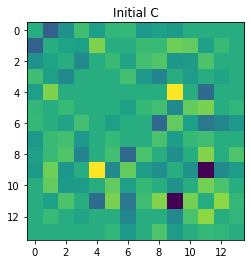

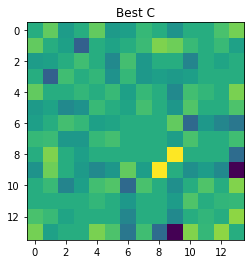

In [12]:
import numpy as np
from matplotlib import pyplot as plt

# This generates 100 variables that could possibly be assigned to 5 clusters
n_variables = A.shape[0]
n_clusters = 7
# # To keep this example simple, each cluster will have a fixed size
cluster_size = n_variables // n_clusters
C = A

def score(C):
    '''
    Function to assign a score to an ordered covariance matrix.
    High correlations within a cluster improve the score.
    High correlations between clusters decease the score.
    '''
    score = 0
    for cluster in range(n_clusters):
        inside_cluster = np.arange(cluster_size) + cluster * cluster_size
        outside_cluster = np.setdiff1d(range(n_variables), inside_cluster)

        # Belonging to the same cluster
        score += np.sum(C[inside_cluster, :][:, inside_cluster])

        # Belonging to different clusters
        score -= np.sum(C[inside_cluster, :][:, outside_cluster])
        score -= np.sum(C[outside_cluster, :][:, inside_cluster])

    return score


initial_C = C
initial_score = score(C)
initial_ordering = np.arange(n_variables)

plt.figure()
plt.imshow(C, interpolation='nearest')
plt.title('Initial C')
print('Initial ordering:', initial_ordering)
print('Initial matrix score:', initial_score)

# Pretty dumb greedy optimization algorithm that continuously
# swaps rows to improve the score
def swap_rows(C, var1, var2):
    '''
    Function to swap two rows in a covariance matrix,
    updating the appropriate columns as well.
    '''
    D = C.copy()
    D[var2, :] = C[var1, :]
    D[var1, :] = C[var2, :]

    E = D.copy()
    E[:, var2] = D[:, var1]
    E[:, var1] = D[:, var2]

    return E

current_C = C
current_ordering = initial_ordering
current_score = initial_score

max_iter = 10000
for i in range(max_iter):
    # Find the best row swap to make
    best_C = current_C
    best_ordering = current_ordering
    best_score = current_score
    for row1 in range(n_variables):
        for row2 in range(n_variables):
            if row1 == row2:
                continue
            option_ordering = best_ordering.copy()
            option_ordering[row1] = best_ordering[row2]
            option_ordering[row2] = best_ordering[row1]
            option_C = swap_rows(best_C, row1, row2)
            option_score = score(option_C)

            if option_score > best_score:
                best_C = option_C
                best_ordering = option_ordering
                best_score = option_score

    if best_score > current_score:
        # Perform the best row swap
        current_C = best_C
        current_ordering = best_ordering
        current_score = best_score
    else:
        # No row swap found that improves the solution, we're done
        break

# Output the result
plt.figure()
plt.imshow(current_C, interpolation='nearest')
plt.title('Best C')
print('Best ordering:', current_ordering)
print('Best score:', current_score)
print('Cluster     [variables assigned to this cluster]')
print('------------------------------------------------')
for cluster in range(n_clusters):
    print('Cluster %02d  %s' % (cluster + 1, current_ordering[cluster*cluster_size:(cluster+1)*cluster_size]))